In [1]:
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import matplotlib.cbook as cbook

In [2]:
# Get example image
w, h = 512, 512
with cbook.get_sample_data('ct.raw.gz') as datafile:
    s = datafile.read()
A = np.frombuffer(s, np.uint16).astype(float).reshape((w, h))
A /= A.max()

(-0.5, 511.5, 511.5, -0.5)

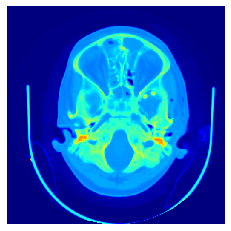

In [3]:
ct_jet = cm.jet(A)
fig, ax = plt.subplots()
ax.imshow(ct_jet)
ax.axis('off')

In [4]:
# Convert image 'im' from colormap 'cm_from' to colormap 'cm_to'
def cremap(im, cm_from, cm_to):
    map_from = cm_from(np.linspace(0, 1, 256))
    cremapped = np.ones(im.shape)
    for i in range(im.shape[0]):
        for j in range(im.shape[1]):
            distance = np.sum((map_from - im[i, j])**2, axis=1);
            cremapped[i, j] = cm_to(np.argmin(distance))
    return cremapped

# Convert from jet to viridis
cremapped = cremap(ct_jet, cm.jet, cm.viridis)

(-0.5, 511.5, 511.5, -0.5)

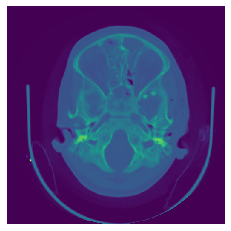

In [5]:
# Plot converted image
fig, ax = plt.subplots()
ax.imshow(cremapped)
ax.axis('off')

(-0.5, 511.5, 511.5, -0.5)

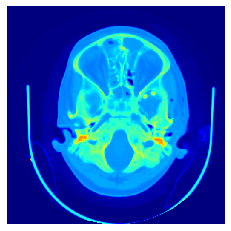

In [6]:
# Sanity check: remap jet to jet
cremapped = cremap(ct_jet, cm.jet, cm.jet)
fig, ax = plt.subplots()
ax.imshow(cremapped)
ax.axis('off')